# Flight Data Analysis For Year 2008
## by Sridhar Sivanand

## Investigation Overview

> In this investigation I would be looking at the status of flights in year 2008 in terms of whether they were on time, delayed or cancelled. The main focus is on the arrival delay and flight cancellation.

## Dataset Overview

> The dataset consisted of over 7 million flight records. The records contained attributes like flight arrival delay, cause of delay, whether it was cancelled or not, cancellation code, origin airport code, destination airport code, day of the week, month etc. A flight arrival delay below 15 minutes was considered to be on time.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df_2008 = pd.read_csv("2008.csv")

# Convert DayOfWeek and Month to appropriate categorical variables
cat_month_week = {"DayOfWeek": {1:"Mon", 2:"Tue", 3: "Wed", 4: "Thu", 5:"Fri", 6:"Sat", 7: "Sun"},
                 "Month" : {1:"Jan", 2:"Feb", 3:"Mar", 4:"Apr", 5: "May", 6: "Jun", 7:"Jul", 8:"Aug", 
                            9:"Sep", 10:"Oct", 11:"Nov", 12:"Dec"}}
df_2008.replace(cat_month_week, inplace=True)
df_2008[['Month', 'DayOfWeek']].head()

# Create a flight status field
df_2008['FlightStatus'] = "On Time"
df_2008.loc[(df_2008['Cancelled'] == 1), 'FlightStatus'] = 'Cancelled'
df_2008.loc[df_2008['ArrDelay'] >= 15, 'FlightStatus'] = 'Delayed' 

# Create a delayed only flights dataframe
df_2008_delay = df_2008.loc[df_2008['FlightStatus'] == 'Delayed']

# Create a cancelled flights only dataframe
df_2008_cancelled = df_2008.loc[df_2008['FlightStatus'] == 'Cancelled']
# Rename the cancellation factors into something more meaningful
df_2008_cancelled.loc[(df_2008_cancelled['CancellationCode'] == 'A'), 'CancellationCode'] = 'carrier'
df_2008_cancelled.loc[(df_2008_cancelled['CancellationCode'] == 'B'), 'CancellationCode'] = 'weather'
df_2008_cancelled.loc[(df_2008_cancelled['CancellationCode'] == 'C'), 'CancellationCode'] = 'NAS'
df_2008_cancelled.loc[(df_2008_cancelled['CancellationCode'] == 'D'), 'CancellationCode'] = 'security'

## Busiest Airports
> Given that the number of airports is over 300 in the dataset, the number of flights for the 5 busiest airports is listed below. The data for the top 5 origin and destination airports appear to be identical with ATL handling the most number of flights incoming and outgoing, over 400,000 apiece.

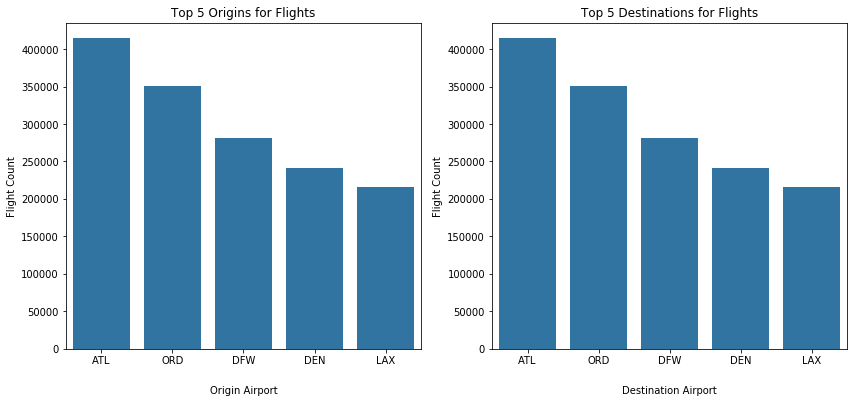

In [3]:
# Observing the flight Origin and Destination. Since there are too many cities in the dataset, only th top 5 are observed.
plt.figure(figsize=[14, 6])
base_color = sb.color_palette()[0]

plt.subplot(1, 2, 1)
#base_color = sb.color_palette()[0]
sb.countplot(data = df_2008, x ='Origin', color = base_color, 
             order=df_2008.Origin.value_counts().nlargest(5).index)
plt.xlabel('Origin Airport', labelpad=20)
plt.ylabel('Flight Count')
plt.title('Top 5 Origins for Flights');

plt.subplot(1, 2, 2)
sb.countplot(data = df_2008, x ='Dest', color = base_color, 
             order=df_2008.Dest.value_counts().nlargest(5).index)
plt.xlabel('Destination Airport', labelpad=20)
plt.ylabel('Flight Count')
plt.title('Top 5 Destinations for Flights');

## Overall Flight Status Data

> From the visualization below we can see that of the over 7 miilion flights in year 2008, more than three quarters of all the flights arrived on time, almost 22% were delayed and around 2% were cancelled.

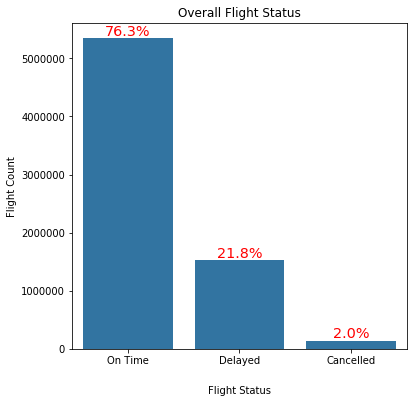

In [4]:
plt.figure(figsize = [6, 6])
base_color = sb.color_palette()[0]
sb.countplot(data = df_2008, x ='FlightStatus', color = base_color,
            order=df_2008.FlightStatus.value_counts().index)
plt.xlabel('Flight Status', labelpad=20)
plt.ylabel('Flight Count')
plt.title('Overall Flight Status')

n_points = df_2008.shape[0]
cat_counts = df_2008['FlightStatus'].value_counts()
locs, labels = plt.xticks() # get the current tick locations and labels

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = cat_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_points)

    # print the annotation just above the top of the bar
    plt.text(loc, count-8, pct_string, ha = 'center', size='x-large', va='bottom', color = 'r')

## Flight Status for the  5 busiest Airports
> The flight status distribution for each of the 5 highest flight origin airports is given below. 
- Flights originating from ATL are on time over 73% of the time, delayed over 25% of the time and cancelled 1.4% of the time. So ATL originating flights are delayed slightly above average and are on time slightly below average in terms of percentages. 
- Flights from ORD are delayed or cancelled above average percentage and the on time percentage is below average around 66%
- Flights from DFW have a below average on time record and above average proportion of delayed and cancelled flights
- Flights from DEN are delayed percentage is above averge and the on time and cancelled percentages are below average
- Flights from LAX are on time above average and are dealayed or cancelled below average in terms of percentages

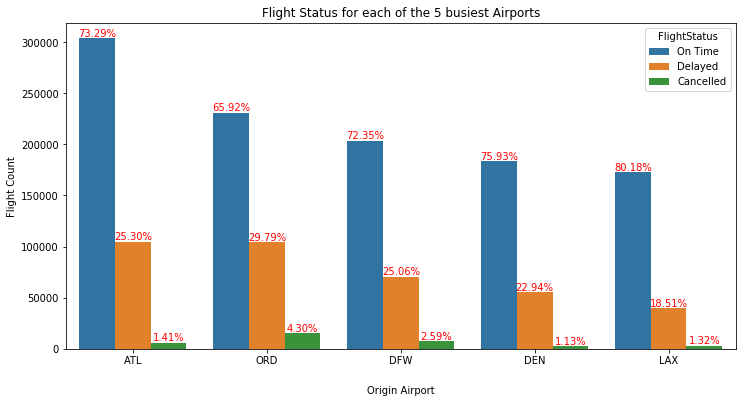

In [5]:
plt.figure(figsize=[12, 6])
top_5_origin_list = df_2008['Origin'].value_counts().nlargest(5).keys()
df_2008_top_5_origin = df_2008.loc[df_2008['Origin'].isin(top_5_origin_list)]

ax = sb.countplot(data = df_2008_top_5_origin, x = 'Origin', hue = 'FlightStatus',
            order=df_2008_top_5_origin.Origin.value_counts().index,
            hue_order=['On Time', 'Delayed', 'Cancelled'], palette=["C0", "C1","C2"])
totals = df_2008_top_5_origin.Origin.value_counts().values
total_count = 0
loop_count = 0
# Adding the percentage values for on time, delayed, cancelled flights for each airport
for p in ax.patches:
    if (loop_count % 5 == 0):
        total_count = 0
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height*100/totals[total_count]),
            ha="center", va='bottom', color = 'r')
    loop_count = loop_count + 1
    total_count = total_count + 1
plt.xlabel('Origin Airport', labelpad=20)
plt.ylabel('Flight Count')
plt.title('Flight Status for each of the 5 busiest Airports')
plt.show();

## Flight Delay Factors

> Off the delayed flights, the most common cause of arrival delay was late aircraft, followed by NAS, Carrier and weather. The smallest contibuting factor to delays was security

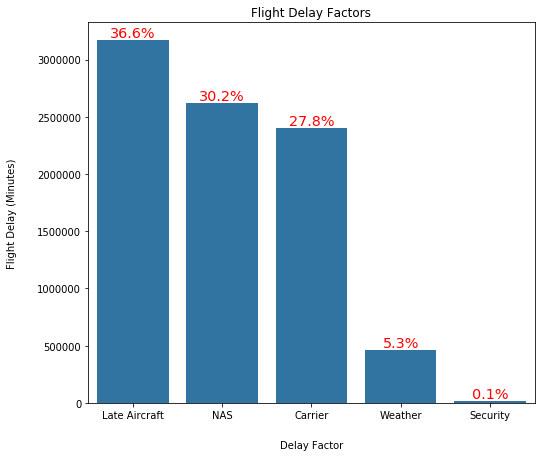

In [6]:
# Bar Chart for the arrival delay factors
plt.figure(figsize = [8, 7])
x_labels = {'Late Aircraft': 'LateAircraftDelay', 'NAS':'NASDelay', 'Carrier':'CarrierDelay',
           'Weather': 'WeatherDelay', 'Security': 'SecurityDelay'}
y_labels = {'0':0, '500000': 500000, '1000000': 1000000, '1500000': 1500000, '2000000': 2000000, 
            '2500000':2500000, '3000000':3000000, '3500000':3500000}
delay_factor_series = df_2008_delay[['CarrierDelay', 'LateAircraftDelay', 'NASDelay', 'WeatherDelay', 'SecurityDelay']].sum()
delay_factor_series.sort_values(ascending=False, inplace=True)

ax = sb.barplot(delay_factor_series.index, delay_factor_series.values, color = base_color)
ax.set_xticklabels(x_labels)
ax.set_yticklabels(y_labels)
plt.xlabel('Delay Factor', labelpad=20)
plt.ylabel('Flight Delay (Minutes)', labelpad=20)
plt.title('Flight Delay Factors');

n_points = delay_factor_series.shape[0]
locs, labels = plt.xticks() # get the current tick locations and labels
total_delay = delay_factor_series.nlargest(5).values.sum()

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):
    # get the text property for the label to get the correct count
    count = delay_factor_series.get(x_labels.get(label.get_text()))
    pct_string = '{:0.1f}%'.format(100*count/total_delay)

    # print the annotation just above the top of the bar
    plt.text(loc, count-8, pct_string, ha = 'center', size='x-large', va='bottom', color = 'r')

## Flight Delays by Month
> From the chart below flight delays seem to meak in the holiday months of December and June. December had around 170,000 delayed flights

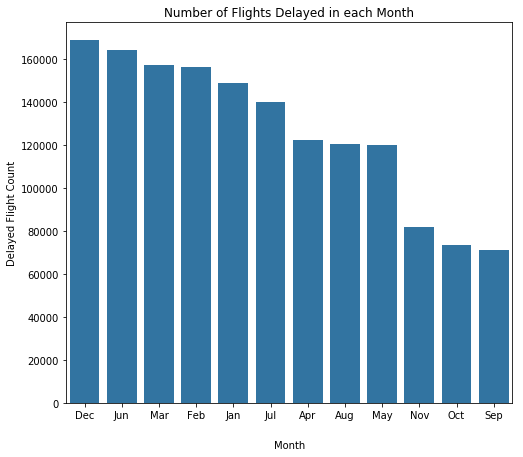

In [7]:
plt.figure(figsize = [8, 7])
sb.countplot(data = df_2008_delay, x ='Month', color = base_color,
            order=df_2008_delay.Month.value_counts().index)
plt.title('Number of Flights Delayed in each Month')
plt.xlabel('Month', labelpad=20)
plt.ylabel('Delayed Flight Count')
plt.title('Number of Flights Delayed in each Month');

## Flight Cancellation Factors
> Flights are cancelled due to weather 39.9% of the time. Carrier caused 39.5% of the cancellations and NAS contributed about 20.5% of cancellations


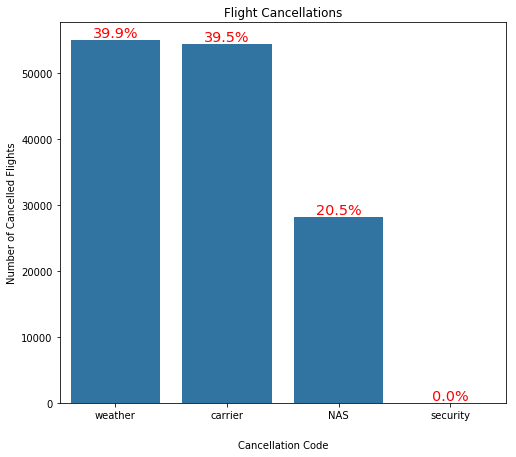

In [8]:

# Examining the proportion of different cancellation Factors
plt.figure(figsize=[8, 7])
base_color = sb.color_palette()[0]
sb.countplot(data = df_2008_cancelled, x ='CancellationCode', color = base_color,
             order = df_2008_cancelled['CancellationCode'].value_counts().index)
n_points = df_2008_cancelled.shape[0]
cat_counts = df_2008_cancelled['CancellationCode'].value_counts()
locs, labels = plt.xticks() # get the current tick locations and labels

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = cat_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_points)

    # print the annotation just above the top of the bar.
    # For some wierd reason only with va='bottom', am I able to get the % above the bor.
    plt.text(loc, count-8, pct_string, ha = 'center', size='x-large', va='bottom', color = 'r')
    
plt.xlabel('Cancellation Code', labelpad=20)
plt.ylabel('Number of Cancelled Flights')
plt.title('Flight Cancellations');

## Flight Cancellations by Month
> Cancelled flights seem to be the highest during the winter months of December, January and February, peaking in February with over 20,000 flight cancellations.

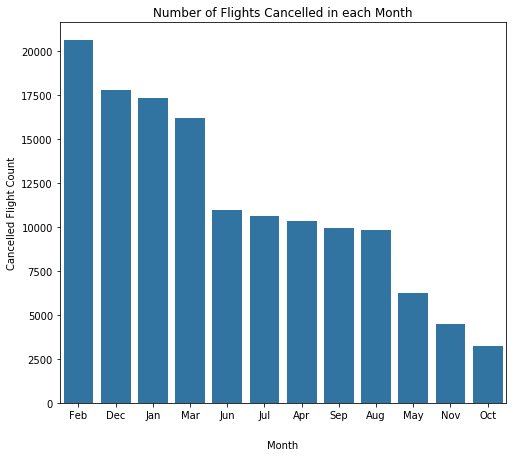

In [9]:
plt.figure(figsize = [8, 7])
sb.countplot(data = df_2008_cancelled, x ='Month', color = base_color,
            order=df_2008_cancelled.Month.value_counts().index)
plt.xlabel('Month', labelpad=20)
plt.ylabel('Cancelled Flight Count')
plt.title('Number of Flights Cancelled in each Month');
